<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [23]:
# Paquetes necesarios


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [14]:
WINE = "#6E1E2B"
WINE_SOFT = "#8E2A3A"
PINK = "#F6C6D0"
PINK_LIGHT = "#FBE3E8"
WHITE = "#FFFFFF"
BLACK = "#111111"
GRID = "#D9D9E3"

mpl.rcParams.update({
    "figure.facecolor": WHITE,
    "axes.facecolor": WHITE,
    "axes.edgecolor": GRID,
    "axes.labelcolor": BLACK,
    "xtick.color": BLACK,
    "ytick.color": BLACK,
    "text.color": BLACK,
    "grid.color": GRID,
    "grid.alpha": 0.5,
    "axes.grid": True,
})
CLUSTER_COLORS = [WINE, WINE_SOFT, "#B24A5C", "#D86A7C", PINK]


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [15]:
df = pd.read_csv("Cleaned_Viral_Social_Media_Trends.csv")

print("Dimensiones:", df.shape)
display(df.head(5))

# Tipos de datos
df.info()

# Nulos y duplicados
print("\nNulos por columna:\n", df.isna().sum())
print("\nDuplicados:", df.duplicated().sum())

# Resumen numérico para observar escalas
display(df[["Views","Likes","Shares","Comments"]].describe().T)


Dimensiones: (5000, 11)


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB

Nulos por columna:
 Post_ID             0
Post_Date           0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
En

,count,mean,std,min,25%,50%,75%,max
Views,5000.0,2.494066e+06,1.459490e+06,1266.0,1186207.25,2497373.0,3759781.00,4999430.0
Likes,5000.0,2.514750e+05,1.443496e+05,490.0,126892.25,249443.0,373970.75,499922.0
Shares,5000.0,5.051956e+04,2.906636e+04,52.0,25029.00,50839.5,75774.25,99978.0
Comments,5000.0,2.488839e+04,1.428450e+04,18.0,12305.25,25004.0,37072.75,49993.0


**Observa las filas y columnas para verificar todo este en orden**

In [16]:
print("Dimensiones:", df.shape)

display(df.head(5))                 # primeras filas
display(df.sample(5, random_state=42))  # muestra aleatoria reproducible


Dimensiones: (5000, 11)


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
1501,Post_1502,2023-12-15,Instagram,#Comedy,Video,Canada,3239663,288436,94297,5399,High
2586,Post_2587,2022-03-01,Instagram,#Education,Post,Japan,3759036,49515,94487,19525,Medium
2653,Post_2654,2023-02-09,Instagram,#Gaming,Shorts,Brazil,3697216,209784,41633,19831,Medium
1055,Post_1056,2023-07-20,TikTok,#Fitness,Post,Brazil,2878436,149765,9840,42118,High
705,Post_706,2023-06-16,TikTok,#Fashion,Live Stream,Germany,1213710,468518,1746,24547,High


In [8]:
df["Post_Date"] = pd.to_datetime(df["Post_Date"], errors="coerce")
print("Rango de fechas:", df["Post_Date"].min(), "→", df["Post_Date"].max())


Rango de fechas: 2022-01-01 00:00:00 → 2023-12-30 00:00:00


**Muestra una descripción de los datos numéricos + categóricos**

In [17]:
# Resumen completo (incluye categóricas)
display(df.describe(include="all").T)

# Distribución de variables categóricas clave
for col in ["Platform", "Content_Type", "Region", "Engagement_Level"]:
    print(f"\n--- {col} ---")
    display(df[col].value_counts().head(10))


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Post_ID,5000,5000,Post_5000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post_Date,5000,729,2023-10-16,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,5000,4,YouTube,1324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hashtag,5000,10,#Fitness,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content_Type,5000,6,Live Stream,855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,5000,8,USA,677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Views,5000.0,NaN,NaN,NaN,2494066.444,1459489.824435,1266.0,1186207.25,2497373.0,3759781.0,4999430.0
Likes,5000.0,NaN,NaN,NaN,251475.0298,144349.583384,490.0,126892.25,249443.0,373970.75,499922.0
Shares,5000.0,NaN,NaN,NaN,50519.562,29066.362671,52.0,25029.0,50839.5,75774.25,99978.0
Comments,5000.0,NaN,NaN,NaN,24888.3938,14284.504319,18.0,12305.25,25004.0,37072.75,49993.0



--- Platform ---


,count
Platform,
YouTube,1324
TikTok,1260
Instagram,1212
Twitter,1204



--- Content_Type ---


,count
Content_Type,
Live Stream,855
Post,853
Reel,841
Tweet,836
Video,828
Shorts,787



--- Region ---


,count
Region,
USA,677
Canada,658
UK,647
Brazil,641
India,617
Australia,602
Japan,592
Germany,566



--- Engagement_Level ---


,count
Engagement_Level,
Low,1729
High,1673
Medium,1598


In [10]:
print("Nulos totales:", df.isna().sum().sum())
print("Duplicados:", df.duplicated().sum())
print("\nTipos de datos:\n", df.dtypes)


Nulos totales: 0
Duplicados: 0

Tipos de datos:
 Post_ID                     object
Post_Date           datetime64[ns]
Platform                    object
Hashtag                     object
Content_Type                object
Region                      object
Views                        int64
Likes                        int64
Shares                       int64
Comments                     int64
Engagement_Level            object
dtype: object


Para clustering jerárquico, calculamos distancias. Si no escalamos, Views que se encuentra en millones aplastará a Likes/Shares/Comments y el dendrograma quedará sesgado.

In [18]:
num_cols = ["Views", "Likes", "Shares", "Comments"]
X = df[num_cols].copy()


In [19]:
X_log = np.log1p(X)  # log(1 + x)


No escalamos columnas como Post_ID, y no introduciomos Engagement_Level al escalado la usaremo luego para interpretar/validar.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

X_scaled = pd.DataFrame(X_scaled, columns=[c+"_scaled" for c in num_cols])
display(X_scaled.describe().T)


,count,mean,std,min,25%,50%,75%,max
Views_scaled,5000.0,-6.295409e-16,1.0001,-7.154670,-0.418534,0.314439,0.717238,0.997797
Likes_scaled,5000.0,-1.742251e-15,1.0001,-6.033212,-0.387602,0.299354,0.710930,1.005957
Shares_scaled,5000.0,9.166001e-17,1.0001,-6.587858,-0.398837,0.313404,0.714523,0.993129
Comments_scaled,5000.0,5.854872e-16,1.0001,-7.110878,-0.420941,0.311740,0.718745,1.027740


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

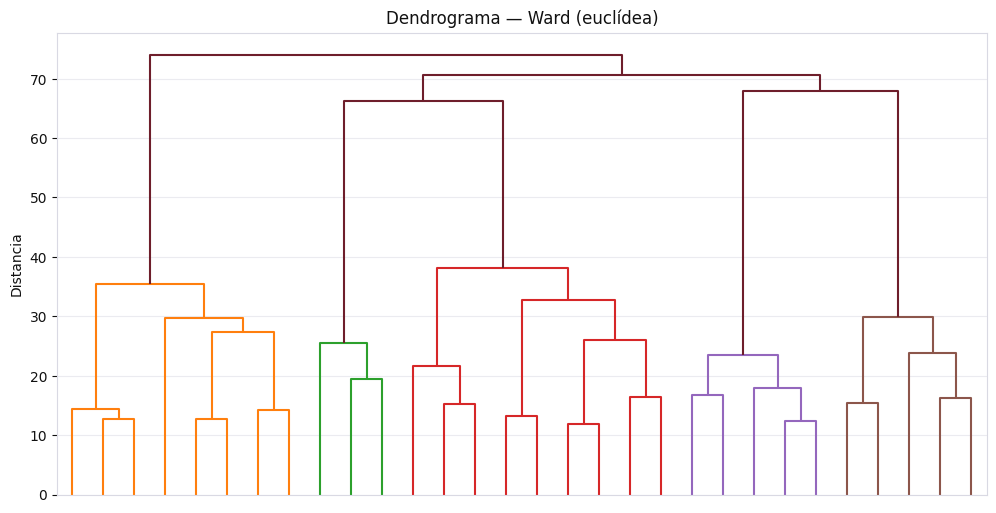

Últimas 10 distancias de fusión: [27.37585512 29.66666257 29.92765615 32.78602444 35.4598134  38.17072167
 66.188562   67.87701852 70.69396344 74.07161508]


In [25]:
WINE = "#6E1E2B"
GRID = "#D9D9E3"

Z_ward = linkage(X_scaled, method="ward")  # Ward asume euclídea

plt.figure(figsize=(12,6))
dendrogram(
    Z_ward,
    no_labels=True,              # sin etiquetas (son 5000)
    truncate_mode="lastp", p=30, # muestra las últimas 30 fusiones (más legible)
    above_threshold_color=WINE
)
plt.title("Dendrograma — Ward (euclídea)")
plt.ylabel("Distancia")
plt.grid(axis="y", color=GRID, alpha=0.5)
plt.show()

# Mira distancias de las últimas fusiones (te ayuda a elegir corte)
print("Últimas 10 distancias de fusión:", Z_ward[-10:, 2])

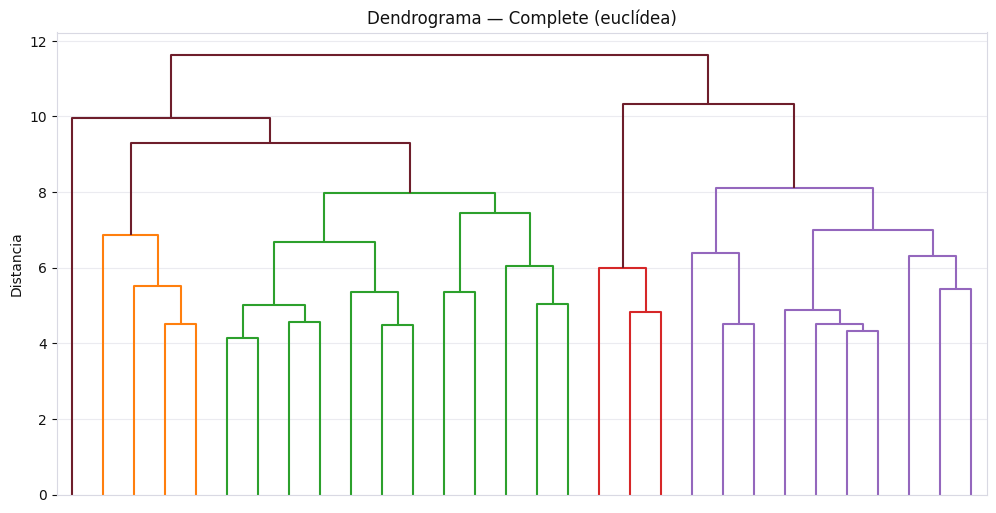

Dendrograma — Complete (euclídea) -> últimas 5 distancias: [ 8.10017     9.30486983  9.95006562 10.32524257 11.63436186]


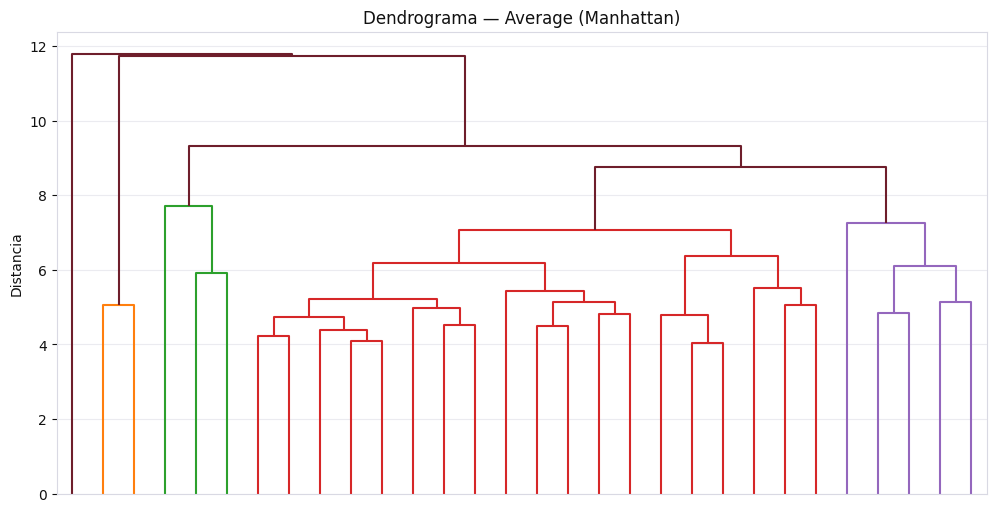

Dendrograma — Average (Manhattan) -> últimas 5 distancias: [ 7.71975234  8.74982013  9.30809705 11.73992447 11.79657708]


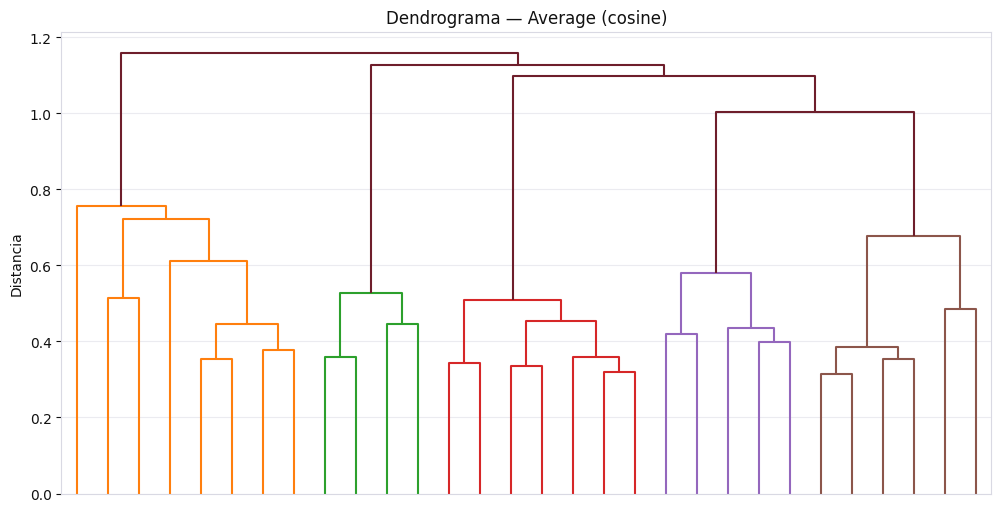

Dendrograma — Average (cosine) -> últimas 5 distancias: [0.75712107 1.00231886 1.09911767 1.12829654 1.15735417]


In [24]:
def plot_hc(X_scaled, metric, method, title):
    # Calcula distancias entre puntos con la métrica elegida
    D = pdist(X_scaled, metric=metric)
    Z = linkage(D, method=method)

    plt.figure(figsize=(12,6))
    dendrogram(Z, no_labels=True, truncate_mode="lastp", p=30, above_threshold_color=WINE)
    plt.title(title)
    plt.ylabel("Distancia")
    plt.grid(axis="y", color=GRID, alpha=0.5)
    plt.show()

    print(f"{title} -> últimas 5 distancias:", Z[-5:, 2])
    return Z

Z_complete_euc = plot_hc(X_scaled, metric="euclidean", method="complete",
                         title="Dendrograma — Complete (euclídea)")

Z_average_man = plot_hc(X_scaled, metric="cityblock", method="average",
                        title="Dendrograma — Average (Manhattan)")

Z_average_cos = plot_hc(X_scaled, metric="cosine", method="average",
                        title="Dendrograma — Average (cosine)")


**Definimos el corte para k (clusters)**

In [26]:
def elegir_corte_para_k(Z, target_k=5, lo=40, hi=66, steps=400):
    cuts = np.linspace(lo, hi, steps)
    candidatos = []
    for cut in cuts:
        labels = fcluster(Z, t=cut, criterion="distance")
        k = len(np.unique(labels))
        if k == target_k:
            sizes = pd.Series(labels).value_counts()
            candidatos.append((cut, sizes.min(), sizes.std(), sizes.max()))
    if not candidatos:
        return None, None

    # Elegimos el que maximiza el tamaño mínimo (evita clusters tiny)
    candidatos = sorted(candidatos, key=lambda x: (-x[1], x[2]))
    best_cut = candidatos[0][0]
    best_labels = fcluster(Z, t=best_cut, criterion="distance")
    return best_cut, best_labels

cut_5, labels_5 = elegir_corte_para_k(Z_ward, target_k=5, lo=40, hi=66)

print("Corte elegido:", cut_5)
print("Número de clusters:", len(np.unique(labels_5)))
pd.Series(labels_5).value_counts().sort_index()

Corte elegido: 40.0
Número de clusters: 5


,count
1,1017
2,275
3,2673
4,433
5,602


**Dibujamos el dendrograma con la línea de corte**

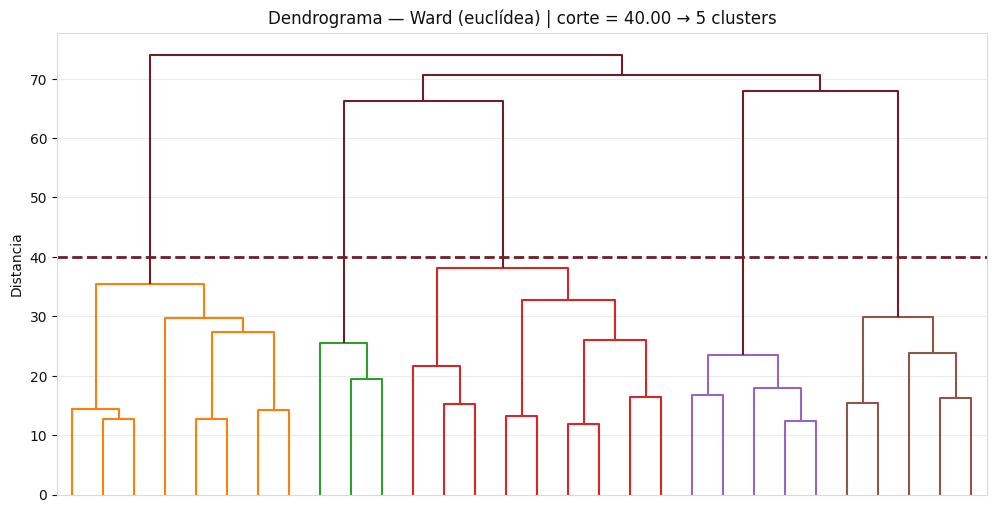

In [27]:
WINE = "#6E1E2B"
GRID = "#D9D9E3"

plt.figure(figsize=(12,6))
dendrogram(Z_ward, no_labels=True, truncate_mode="lastp", p=30, above_threshold_color=WINE)
plt.axhline(y=cut_5, color=WINE, linewidth=2, linestyle="--")
plt.title(f"Dendrograma — Ward (euclídea) | corte = {cut_5:.2f} → 5 clusters")
plt.ylabel("Distancia")
plt.grid(axis="y", color=GRID, alpha=0.5)
plt.show()

In [28]:
df = df.copy()
df["cluster"] = labels_5

# Tamaños
display(df["cluster"].value_counts().sort_index())

# Perfil numérico (medianas = más robustas)
num_cols = ["Views", "Likes", "Shares", "Comments"]
display(df.groupby("cluster")[num_cols].median().round(0))


,count
cluster,
1,1017
2,275
3,2673
4,433
5,602


,Views,Likes,Shares,Comments
cluster,,,,
1,3008256.0,249768.0,55955.0,5823.0
2,2104258.0,224437.0,3049.0,27357.0
3,2722178.0,304893.0,51315.0,31415.0
4,231868.0,214887.0,57791.0,26950.0
5,2487902.0,38326.0,53454.0,26618.0


In [29]:
tab = pd.crosstab(df["cluster"], df["Engagement_Level"], normalize="index") * 100
display(tab.round(1))


Engagement_Level,High,Low,Medium
cluster,,,
1,33.6,32.8,33.5
2,27.3,34.9,37.8
3,34.3,34.7,30.9
4,31.9,37.6,30.5
5,33.2,34.6,32.2


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>